# Analysis of Schools in different regions of Hyderabad

<font size='3'>
    I have made this report as part of my Capstone Project for the Coursera Course
    </font>

## Introduction


It is important to have access to quality education at the school level for all people. <br>In an attempt to make it possible the government has to identify the various regions where a lot of infrastructure needs to be built in order to provide people living in those areas access to schooling at affordable rates.<br>
It also helps private companies to identify all those regions where they have a great potential to build schools.<br>
Also it helps families decide the neighbourhoods in which they can have access to good and quality education.<br>
As part of my capstone project, in this report I have tried to analayze the various regions in Hyderabad where there is lack of infrastructure at the school level.

## Data


I have taken the list of neighbourhoods in Hyderabad from Wikipedia and have found their latitudes and longitudes using geocoder.<br>
Then using FourSquare API I have identified the location of various schools in Hyderabad and plotted them using FourSquare API to get a rough idea of distribution.<br>
I have identified 235 schools along with their locations in Hyderabad which was returned by FourSquare API.<br>
Basically the data consists of the Neighbourhood along with the School name, Latitude, Longitude and category of school.</br>
For plotting the choropleth map I have used geospatial data from
Using this information I have analyzed and identified the various regions lacking in infrastructure with respect to schools

## Importing Neccessary Libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
!pip install geopy
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import re
import json
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
!pip install folium
#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 92kB 16.3MB/s eta 0:00:01
Folium installed
Libraries imported.


In [2]:
import urllib.request

## Using Beautiful Soup for Scraping

In [3]:
url="https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Hyderabad,_India"
page=urllib.request.urlopen(url)

In [4]:
!pip install beautifulsoup4
from bs4 import BeautifulSoup

In [5]:
soup = BeautifulSoup(page, "lxml")
print(soup)

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Category:Neighbourhoods in Hyderabad, India - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XqAPaQpAMNYAAeCYA@EAAABD","wgCSPNonce":!1,"wgCanonicalNamespace":"Category","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":14,"wgPageName":"Category:Neighbourhoods_in_Hyderabad,_India","wgTitle":"Neighbourhoods in Hyderabad, India","wgCurRevisionId":881961440,"wgRevisionId":881961440,"wgArticleId":3839100,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Neighbourhoods in Telangana","Geography of Hyderabad, India","Neighbourhoods in Andhra Prad

## Obtaining the List of Neighbourhoods

We can see that all the neighbourhoods are present in ``<a>`` tags. So I have stored these in the neighbourhood_names list

In [6]:
#print(soup)
neighbourhood_names=[]
a_tags=soup.find_all('a')
for a_tag in a_tags:
    neighbourhood_names.append(a_tag.text)
print(neighbourhood_names)

['', 'Help', 'Jump to navigation', 'Jump to search', 'learn more', 'next page', 'A. S. Rao Nagar', 'A.C. Guards', 'Abhyudaya Nagar', 'Abids', 'Adikmet', 'Afzal Gunj', 'Aghapura', 'Aliabad, Hyderabad', 'Alijah Kotla', 'Allwyn Colony', 'Alwal', 'Amberpet', 'Ameerpet', 'Ashok Nagar, Hyderabad', 'Asif Nagar', 'Attapur', 'Azamabad, Hyderabad', 'Azampura', 'Badichowdi', 'Bagh Lingampally', 'Bairamalguda', 'Balkampet', 'Banjara Hills', 'Bank Street, Hyderabad', 'Barkas, Hyderabad', 'Barkatpura', 'Basheerbagh', 'Bazarghat', 'Begum Bazaar', 'Begumpet', 'Bharat Nagar', 'BHEL Township, Hyderabad', 'BJR Nagar', 'Boggulkunta', 'Borabanda', 'Bowenpally', 'Brahman Vaadi', 'Chaderghat', 'Champapet', 'Chanchalguda', 'Chandrayan Gutta', 'Chatta Bazaar', 'Cherlapally', 'Chikkadpally', 'Chilkalguda', 'Chintal Basti', 'Chintalakunta', 'Dabirpura', 'Dar-ul-Shifa', 'Dhoolpet', 'Dilsukhnagar', 'Domalguda', "ECIL 'X' Roads", 'Edi Bazar', 'Erragadda', 'Fateh Nagar, Hyderabad', 'Ferozguda', 'Film Nagar', 'Gachib

However some of the entries in the list are irrelevent so the list has been sliced to only get relevant information.

In [7]:
start=neighbourhood_names.index('A. S. Rao Nagar')
end=neighbourhood_names.index('Somajiguda')
neighbourhood_names=neighbourhood_names[start:end+1]
#print(neighbourhood_names)

In [8]:
lst=['Srinagar Colony','Suchitra Center','Sultan Bazar','Tarnaka','Tilak Nagar','Tirumalagiri','Tolichowki','Uddengadda','Umdanagar','Uppal Kalan','Uppuguda','Vanasthalipuram','Vasavi Colony','Vidyanagar','Vikrampuri','Warsiguda','Yakutpura','Yapral','Yellareddyguda','Yousufguda']
for item in lst:
    neighbourhood_names.append(item)
print(neighbourhood_names)

['A. S. Rao Nagar', 'A.C. Guards', 'Abhyudaya Nagar', 'Abids', 'Adikmet', 'Afzal Gunj', 'Aghapura', 'Aliabad, Hyderabad', 'Alijah Kotla', 'Allwyn Colony', 'Alwal', 'Amberpet', 'Ameerpet', 'Ashok Nagar, Hyderabad', 'Asif Nagar', 'Attapur', 'Azamabad, Hyderabad', 'Azampura', 'Badichowdi', 'Bagh Lingampally', 'Bairamalguda', 'Balkampet', 'Banjara Hills', 'Bank Street, Hyderabad', 'Barkas, Hyderabad', 'Barkatpura', 'Basheerbagh', 'Bazarghat', 'Begum Bazaar', 'Begumpet', 'Bharat Nagar', 'BHEL Township, Hyderabad', 'BJR Nagar', 'Boggulkunta', 'Borabanda', 'Bowenpally', 'Brahman Vaadi', 'Chaderghat', 'Champapet', 'Chanchalguda', 'Chandrayan Gutta', 'Chatta Bazaar', 'Cherlapally', 'Chikkadpally', 'Chilkalguda', 'Chintal Basti', 'Chintalakunta', 'Dabirpura', 'Dar-ul-Shifa', 'Dhoolpet', 'Dilsukhnagar', 'Domalguda', "ECIL 'X' Roads", 'Edi Bazar', 'Erragadda', 'Fateh Nagar, Hyderabad', 'Ferozguda', 'Film Nagar', 'Gachibowli', 'Gaddiannaram', 'Golnaka', 'Goshamahal', 'Gudimalkapur', 'Gulzar Houz', 

In [9]:
n_df=pd.DataFrame(neighbourhood_names,columns=['Neighbourhood'])
n_df.head()
n_df.shape

(220, 1)

## Getting Latitude and Longitude of Neighbourhoods

Using geocoder I have then obtained the Latitude and Longituded of each neighbourhood.

In [10]:
!pip install geocoder
import geocoder # import geocoder

# initialize your variable to None
latitudes=[]
longitudes=[]
count=0
# loop until you get the coordinates
for index,row in n_df.iterrows():
    print(count)
    lat_lng_coords = None
    neighbourhood=row['Neighbourhood']
    while(lat_lng_coords is None):
        print('2')
        g = geocoder.arcgis('{}, Hyderabad, India'.format(neighbourhood))
        lat_lng_coords = g.latlng
    count=count+1
    latitudes.append(lat_lng_coords[0])
    longitudes.append(lat_lng_coords[1])
n_df['Latitude']=latitudes
n_df['Longitude']=longitudes
n_df.head()

     |████████████████████████████████| 102kB 17.2MB/s ta 0:00:01
0
2
1
2
2
2
3
2
4
2
5
2
6
2
7
2
8
2
9
2
10
2
11
2
12
2
13
2
14
2
15
2
16
2
17
2
18
2
19
2
20
2
21
2
22
2
23
2
24
2
25
2
26
2
27
2
28
2
29
2
30
2
31
2
32
2
33
2
34
2
35
2
36
2
37
2
38
2
39
2
40
2
41
2
42
2
43
2
44
2
45
2
46
2
47
2
48
2
49
2
50
2
51
2
52
2
53
2
54
2
55
2
56
2
57
2
58
2
59
2
60
2
61
2
62
2
63
2
64
2
65
2
66
2
67
2
68
2
69
2
70
2
71
2
72
2
73
2
74
2
75
2
76
2
77
2
78
2
79
2
80
2
81
2
82
2
83
2
84
2
85
2
86
2
87
2
88
2
89
2
90
2
91
2
92
2
93
2
94
2
95
2
96
2
97
2
98
2
99
2
100
2
101
2
102
2
103
2
104
2
105
2
106
2
107
2
108
2
109
2
110
2
111
2
112
2
113
2
114
2
115
2
116
2
117
2
118
2
119
2
120
2
121
2
122
2
123
2
124
2
125
2
126
2
127
2
128
2
129
2
130
2
131
2
132
2
133
2
134
2
135
2
136
2
137
2
138
2
139
2
140
2
141
2
142
2
143
2
144
2
145
2
146
2
147
2
148
2
149
2
150
2
151
2
152
2
153
2
154
2
155
2
156
2
157
2
158
2
159
2
160
2
161
2
162
2
163
2
164
2
165
2
166
2
167
2
168
2
169
2
170
2
171
2
172
2
173
2


,Neighbourhood,Latitude,Longitude
0,A. S. Rao Nagar,17.411200,78.508240
1,A.C. Guards,17.392977,78.456867
2,Abhyudaya Nagar,17.337650,78.564140
3,Abids,17.389800,78.476580
4,Adikmet,17.410610,78.515130


## FourSquare Credentials

In [11]:
CLIENT_ID = 'VB4RCFLEFQLU3ODO20N54NBUETVANY34YKIDZ0QZ3INNOIVO' # your Foursquare ID
CLIENT_SECRET = 'SAOFLKSO3HP1ZTRUNFXO23MTCFHNU01IRMQ5T2TAAJKZ2EL0' # your Foursquare Secret
VERSION = '20200101' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VB4RCFLEFQLU3ODO20N54NBUETVANY34YKIDZ0QZ3INNOIVO
CLIENT_SECRET:SAOFLKSO3HP1ZTRUNFXO23MTCFHNU01IRMQ5T2TAAJKZ2EL0


In [12]:
limit=100
radius=1000
#lat=17.389800
#lng=78.476580
search_query='School'

## Using Foursquare to Obtain the Schools in each Area

In [21]:
column_names=['Neighbourhood','Latitude','Longitude','School','School_Latitude','School_Longitude','School_category']
mydf=pd.DataFrame(columns=column_names)
for name, lat, lng in zip(n_df['Neighbourhood'],n_df['Latitude'],n_df['Longitude']):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, search_query, radius, limit)
    results = requests.get(url).json()
    k=results['response']['venues']
    for school in k:
        if len(school['categories'])>0:
            mydf=mydf.append({'Neighbourhood':name,'Latitude':lat,'Longitude':lng,'School':school['name'],'School_Latitude':school['location']['lat'],'School_Longitude':school['location']['lng'],'School_category':school['categories'][0]['name']},ignore_index=True)
        else:
            mydf=mydf.append({'Neighbourhood':name,'Latitude':lat,'Longitude':lng,'School':school['name'],'School_Latitude':school['location']['lat'],'School_Longitude':school['location']['lng'],'School_category':'Not Mentioned'},ignore_index=True)


#venues_list.append([(
#            'Abids', 
#            lat, 
#            lng, 
#            v['venue']['name'], 
#            v['venue']['location']['lat'], 
#            v['venue']['location']['lng'],  
#            v['venue']['categories'][0]['name']) for v in results])

In [22]:
mydf.head()

,Neighbourhood,Latitude,Longitude,School,School_Latitude,School_Longitude,School_category
0,A. S. Rao Nagar,17.411200,78.508240,"Mennonite Brethem High School, Zamistanpur",17.410229,78.501984,School
1,A. S. Rao Nagar,17.411200,78.508240,Reddy & Reddy Motor Driving School,17.401711,78.508499,School
2,A. S. Rao Nagar,17.411200,78.508240,Sri Aurobindo International School,17.400952,78.505043,College Academic Building
3,A.C. Guards,17.392977,78.456867,Genesis high school,17.395249,78.457319,Student Center
4,A.C. Guards,17.392977,78.456867,"Govt High School, Vijaya Nagar Colony",17.394348,78.454649,Student Center


### Cleaning the Data to remove unneccessary rows

In [23]:
mydf=mydf[~mydf.School.str.contains("Driving",case=False)]
mydf=mydf[~mydf.School.str.contains("Sound",case=False)]
mydf=mydf[~mydf.School.str.contains("Music",case=False)]
mydf=mydf[~mydf.School.str.contains("Management",case=False)]
mydf=mydf[~mydf.School.str.contains("office",case=False)]
mydf=mydf[~mydf.School.str.contains("bank",case=False)]
mydf=mydf[~mydf.School_category.str.contains("bank",case=False)]
mydf=mydf[~mydf.School_category.str.contains("architecture",case=False)]
mydf=mydf[~mydf.School_category.str.contains("engineering",case=False)]
mydf=mydf[~mydf.School_category.str.contains("library",case=False)]
#mydf=mydf.drop(21)
mydf=mydf.reset_index(drop=True)
mydf

,Neighbourhood,Latitude,Longitude,School,School_Latitude,School_Longitude,School_category
0,A. S. Rao Nagar,17.411200,78.508240,"Mennonite Brethem High School, Zamistanpur",17.410229,78.501984,School
1,A. S. Rao Nagar,17.411200,78.508240,Sri Aurobindo International School,17.400952,78.505043,College Academic Building
2,A.C. Guards,17.392977,78.456867,Genesis high school,17.395249,78.457319,Student Center
3,A.C. Guards,17.392977,78.456867,"Govt High School, Vijaya Nagar Colony",17.394348,78.454649,Student Center
4,A.C. Guards,17.392977,78.456867,St. Anns Girls High School For Girls,17.394340,78.453383,College Academic Building
5,A.C. Guards,17.392977,78.456867,hyderabad international residential school,17.385760,78.460598,Trade School
6,Abhyudaya Nagar,17.337650,78.564140,School,17.345389,78.559057,College Academic Building
7,Abids,17.389800,78.476580,Diamond Jubilee High School,17.389743,78.474340,High School
8,Abids,17.389800,78.476580,John's High School,17.393322,78.476040,Not Mentioned
9,Abids,17.389800,78.476580,Little Flower High School,17.392965,78.474798,High School


However it is possible that a school may appear twice because of its occurence within 1km radius of each neighbourhood. So I have removed these duplicates and kept only 1st occurence in a new dataframe, mydf1.

In [24]:
mydf1 = mydf.drop_duplicates(subset=['School_Latitude','School_Longitude'],
                                       keep='first').reset_index(drop=True)
mydf1.shape

(235, 7)

### Categorizing the Data and Removing unneccessary categories

Certain categories contain irrelevant information though they are mentioned to be a high school or sometimes no information is provided, depending on the case I have categorized these schools as not mentioned or high, whatever the case maybe.

In [26]:
mydf1.loc[(mydf1.School.str.contains('Secondary',case=False)) | (mydf1.School.str.contains('High',case=False)) | (mydf1.School_category.str.contains('High',case=False)),'School_category']='High School'
mydf1.loc[(mydf1.School.str.contains('Play',case=False)) | (mydf1.School.str.contains('Primary',case=False)) | (mydf1.School_category.str.contains('elementary',case=False)) | (mydf1.School.str.contains('Kids',case=False)),'School_category']='Primary/Play'
mydf1.loc[mydf1.School_category.str.contains('college',case=False),'School_category']='Not Mentioned'
mydf1.loc[~((mydf1.School_category.str.contains('Not Mentioned',case=False))|(mydf1.School_category.str.contains('High School',case=False))|(mydf1.School_category.str.contains('Student Center',case=False))|mydf1.School_category.str.contains('Primary/Play',case=False)),'School_category']='Not Mentioned'
mydf1

,Neighbourhood,Latitude,Longitude,School,School_Latitude,School_Longitude,School_category
0,A. S. Rao Nagar,17.411200,78.508240,"Mennonite Brethem High School, Zamistanpur",17.410229,78.501984,High School
1,A. S. Rao Nagar,17.411200,78.508240,Sri Aurobindo International School,17.400952,78.505043,Not Mentioned
2,A.C. Guards,17.392977,78.456867,Genesis high school,17.395249,78.457319,High School
3,A.C. Guards,17.392977,78.456867,"Govt High School, Vijaya Nagar Colony",17.394348,78.454649,High School
4,A.C. Guards,17.392977,78.456867,St. Anns Girls High School For Girls,17.394340,78.453383,High School
5,A.C. Guards,17.392977,78.456867,hyderabad international residential school,17.385760,78.460598,Not Mentioned
6,Abhyudaya Nagar,17.337650,78.564140,School,17.345389,78.559057,Not Mentioned
7,Abids,17.389800,78.476580,Diamond Jubilee High School,17.389743,78.474340,High School
8,Abids,17.389800,78.476580,John's High School,17.393322,78.476040,High School
9,Abids,17.389800,78.476580,Little Flower High School,17.392965,78.474798,High School


### Plotting the Schools on Map using Folium

Based on the data I have plotted the various schools in Hyderabad using Folium.

In [180]:
h_latitude=17.3850
h_longitude=78.4867

school_map = folium.Map(location=[h_latitude, h_longitude], zoom_start=12) # generate map centred around the Conrad Hotel
# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(mydf1['Latitude'],mydf1['Longitude'],mydf1['School']):
    folium.Marker(
        [lat, lng],
        popup=label,
        icon=folium.Icon(color='red',icon='university', prefix='fa')
    ).add_to(school_map)

# display map
school_map

### Getting count of schools in each neighbourhood based on our 1km radius

In [51]:
counts_df=mydf.groupby('Neighbourhood').count()
counts_df=counts_df.reset_index()
counts_df['Neighbourhood']=counts_df['Neighbourhood'].astype(str)
counts_df.shape

(176, 7)

### Counting each category

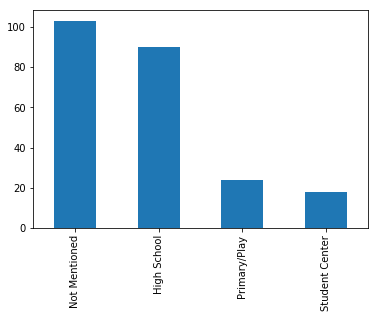

In [32]:
mydf1['School_category'].value_counts().plot(kind='bar')

### Getting the List of Neighbourhoods with no schools within 1km radius

In [87]:
diff=[]
flag=0
for i in n_df['Neighbourhood']:
    for j in counts_df['Neighbourhood']:
        if i==j:
            flag=1
            break
    if flag==0:
        diff.append(i)
    flag=0
print(len(diff))

44


In [88]:
diff_df=pd.DataFrame(diff,columns=['Neighbourhood'])
diff_df.shape

(44, 1)

In [89]:
latitudes=[]
longitudes=[]
count=0
# loop until you get the coordinates
for index,row in diff_df.iterrows():
    lat_lng_coords = None
    neighbourhood=row['Neighbourhood']
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Hyderabad, India'.format(neighbourhood))
        lat_lng_coords = g.latlng
    latitudes.append(lat_lng_coords[0])
    longitudes.append(lat_lng_coords[1])
diff_df['Latitude']=latitudes
diff_df['Longitude']=longitudes
diff_df.head()

,Neighbourhood,Latitude,Longitude
0,Adikmet,17.41061,78.51513
1,Alwal,17.53543,78.54427
2,Amberpet,17.38582,78.51836
3,Asif Nagar,17.38514,78.44738
4,Attapur,17.36917,78.43683


### Finding the distance to closest school for each neighbourhood

Using above data I have found the distance to closest school for each neighbourhood again by incrementing the radius by 100 metres in every iteration and using Folium API till nearest school is found.

In [90]:
limit=100
radius=1000
r=[]
k=[]
count=0
for name, lat, lng in zip(diff_df['Neighbourhood'],diff_df['Latitude'],diff_df['Longitude']):
    while k==[] and count<10:
        count=count+1
        radius=radius + 100
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, search_query, radius, limit)
        results = requests.get(url).json()
        k=results['response']['venues']
    r.append(radius)
    k=[]
    count=0
    radius=1000
print(r)

[1100, 2000, 1200, 1200, 1300, 1300, 1400, 1700, 1300, 2000, 2000, 1100, 1100, 2000, 1200, 2000, 2000, 1300, 1100, 1900, 1300, 1100, 1100, 2000, 1500, 2000, 1100, 1500, 2000, 1200, 1100, 1100, 2000, 1700, 2000, 1300, 2000, 1200, 1200, 1300, 1100, 2000, 1100, 1100]


In [93]:
diff_df['Near_school']=r
diff_df.head()

,Neighbourhood,Latitude,Longitude,Near_school
0,Adikmet,17.41061,78.51513,1100
1,Alwal,17.53543,78.54427,2000
2,Amberpet,17.38582,78.51836,1200
3,Asif Nagar,17.38514,78.44738,1200
4,Attapur,17.36917,78.43683,1300


In [117]:
diff_df['num_schools_in_1km']=0
diff_df.head()

,Neighbourhood,Latitude,Longitude,Near_school,num_schools_in_1km
0,Adikmet,17.41061,78.51513,1100,0
1,Alwal,17.53543,78.54427,2000,0
2,Amberpet,17.38582,78.51836,1200,0
3,Asif Nagar,17.38514,78.44738,1200,0
4,Attapur,17.36917,78.43683,1300,0


In [119]:
copy=diff_df
copy.shape

(44, 5)

Using above data and information from counts_df, I have created a dataframe containg the distance to nearest school and for those schools for which distance is less than 1km, distance to nearest school is assumed tobe 1km and also number of schools in that neighbourhood has been added.

In [122]:
group_df=mydf.groupby(['Neighbourhood','Latitude','Longitude']).count()
group_df.reset_index()
for index,row in group_df.iterrows():
        copy=copy.append({'Neighbourhood':index[0],'Latitude':index[1],'Longitude':index[2],'Near_school':1000,'num_schools_in_1km':row['School']},ignore_index=True)
copy.shape
    

(220, 5)

### K-Means to categorize the Neighbourhoods

Using the distance to near school and number of schools in that neighbourhood as determining factors, I have classified the neighbourhoods into 3 categories using the K-Means technique.

In [128]:
k_means_df=copy[['Near_school','num_schools_in_1km']]
k_means_df.head()

,Near_school,num_schools_in_1km
0,1100,0
1,2000,0
2,1200,0
3,1200,0
4,1300,0


Standard Scalar has been used to normalize the values.

In [130]:
from sklearn.preprocessing import StandardScaler

X = k_means_df.values[:,:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.01421482, -0.8074331 ],
       [ 3.53238203, -0.8074331 ],
       [ 0.40512228, -0.8074331 ],
       [ 0.40512228, -0.8074331 ],
       [ 0.79602975, -0.8074331 ],
       [ 0.79602975, -0.8074331 ],
       [ 1.18693722, -0.8074331 ],
       [ 2.35965962, -0.8074331 ],
       [ 0.79602975, -0.8074331 ],
       [ 3.53238203, -0.8074331 ],
       [ 3.53238203, -0.8074331 ],
       [ 0.01421482, -0.8074331 ],
       [ 0.01421482, -0.8074331 ],
       [ 3.53238203, -0.8074331 ],
       [ 0.40512228, -0.8074331 ],
       [ 3.53238203, -0.8074331 ],
       [ 3.53238203, -0.8074331 ],
       [ 0.79602975, -0.8074331 ],
       [ 0.01421482, -0.8074331 ],
       [ 3.14147456, -0.8074331 ],
       [ 0.79602975, -0.8074331 ],
       [ 0.01421482, -0.8074331 ],
       [ 0.01421482, -0.8074331 ],
       [ 3.53238203, -0.8074331 ],
       [ 1.57784469, -0.8074331 ],
       [ 3.53238203, -0.8074331 ],
       [ 0.01421482, -0.8074331 ],
       [ 1.57784469, -0.8074331 ],
       [ 3.53238203,

In [131]:
cluster_dataset.shape

(220, 2)

In [146]:
from sklearn.cluster import KMeans 
num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[1 2 1 1 1 1 1 2 1 2 2 1 1 2 1 2 2 1 1 2 1 1 1 2 2 2 1 2 2 1 1 1 2 2 2 1 2
 1 1 1 1 2 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


I have added the label column for each neighbourhood.

In [151]:
copy=copy.drop(['label','label_4'],axis=1)
copy['label']=labels
copy.head()

,Neighbourhood,Latitude,Longitude,Near_school,num_schools_in_1km,label
0,Adikmet,17.41061,78.51513,1100,0,1
1,Alwal,17.53543,78.54427,2000,0,2
2,Amberpet,17.38582,78.51836,1200,0,1
3,Asif Nagar,17.38514,78.44738,1200,0,1
4,Attapur,17.36917,78.43683,1300,0,1


The average of each column is as shown grouped by labels.

In [152]:
copy.groupby('label').mean()

,Latitude,Longitude,Near_school,num_schools_in_1km
label,,,,
0,17.395322,78.478685,1000.000000,18.636364
1,17.412157,78.475229,1025.654450,2.937173
2,17.427935,78.463740,1905.555556,0.000000


In [153]:
label0_df=copy[copy['label']==0]
label1_df=copy[copy['label']==1]
label2_df=copy[copy['label']==2]
print(label0_df.shape,label1_df.shape,label2_df.shape)

(11, 6) (191, 6) (18, 6)


In [181]:
label2_df

,Neighbourhood,Latitude,Longitude,Near_school,num_schools_in_1km,label
1,Alwal,17.535430,78.544270,2000,0,2
7,"BHEL Township, Hyderabad",17.505990,78.304540,1700,0,2
9,Cherlapally,17.466480,78.599990,2000,0,2
10,ECIL 'X' Roads,17.252669,78.378976,2000,0,2
13,Hastinapuram,17.328300,78.549420,2000,0,2
15,Jeedimetla,17.521830,78.454330,2000,0,2
16,Karmanghat,17.340610,78.532580,2000,0,2
19,Kushaiguda,17.481130,78.583700,1900,0,2
23,"Laxminagar Colony, Mehdipatnam",17.583190,78.422700,2000,0,2
24,Lingojiguda,17.350670,78.534040,1500,0,2


In [182]:
label1_df

,Neighbourhood,Latitude,Longitude,Near_school,num_schools_in_1km,label
0,Adikmet,17.410610,78.515130,1100,0,1
2,Amberpet,17.385820,78.518360,1200,0,1
3,Asif Nagar,17.385140,78.447380,1200,0,1
4,Attapur,17.369170,78.436830,1300,0,1
5,Bairamalguda,17.339920,78.545530,1300,0,1
6,Bharat Nagar,17.528340,78.525040,1400,0,1
8,Borabanda,17.452700,78.412560,1300,0,1
11,Edi Bazar,17.344520,78.494190,1100,0,1
12,Ferozguda,17.474120,78.426387,1100,0,1
14,Hayathnagar,17.327070,78.605330,1200,0,1


In [183]:
label0_df

,Neighbourhood,Latitude,Longitude,Near_school,num_schools_in_1km,label
47,Abids,17.389800,78.476580,1000,22,0
54,"Ashok Nagar, Hyderabad",17.407840,78.491500,1000,12,0
62,"Bank Street, Hyderabad",17.388592,78.476651,1000,21,0
65,Basheerbagh,17.402110,78.477700,1000,25,0
69,Boggulkunta,17.391370,78.480230,1000,23,0
99,"Himayatnagar, Hyderabad",17.404860,78.481210,1000,15,0
100,Hyderguda,17.399230,78.480730,1000,26,0
147,Moazzam Jahi Market,17.384480,78.474420,1000,13,0
159,"Nampally, Hyderabad",17.388970,78.467330,1000,17,0
162,Narayanguda,17.396420,78.488420,1000,12,0


Based on the above categories, I have plotted the neighbourhoods on the map using Folium.

In [158]:
hyd_map = folium.Map(location=[h_latitude, h_longitude], zoom_start=12)
incidents = folium.map.FeatureGroup()
for lat, lng, in zip(label0_df['Latitude'],label0_df['Longitude']):
    incidents.add_child(
        folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
        )
    )
for lat, lng, in zip(label1_df['Latitude'],label1_df['Longitude']):
    incidents.add_child(
        folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        fill = True,
        fill_color='green',
        fill_opacity=0.6
        )
    )
for lat, lng, in zip(label2_df['Latitude'],label2_df['Longitude']):
    incidents.add_child(
        folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        fill = True,
        fill_color='red',
        fill_opacity=0.6
        )
    )
# add incidents to map
hyd_map.add_child(incidents)
hyd_map

## CHOROPLETH MAP

### Getting the GeoJson data of Hyderabad

In [159]:
!wget https://raw.githubusercontent.com/datameet/Municipal_Spatial_Data/master/Hyderabad/ghmc-wards.geojson -O hyderabad.json
print('Downloaded')

--2020-04-24 14:29:32--  https://raw.githubusercontent.com/datameet/Municipal_Spatial_Data/master/Hyderabad/ghmc-wards.geojson
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 586420 (573K) [text/plain]
Saving to: ‘hyderabad.json’

100%[======================================>] 586,420     --.-K/s   in 0.02s   

2020-04-24 14:29:33 (27.2 MB/s) - ‘hyderabad.json’ saved [586420/586420]

Downloaded


After obtaining the GeoJson data of Hyderabad, I had to clean the name of the neighbourhood by removing the substring containing the ward number, inorder to plot the choropleth map so that the name contained only the name of the neighbourhood.
The following code performs the task

In [161]:
world_geo=r'hyderabad.json'
world_map=folium.Map(location=[h_latitude,h_longitude],zoom_start=12)

In [162]:

with open(world_geo,'r') as f: 
    # returns JSON object as  
    # a dictionary 
    data = json.load(f) 

    # Iterating through the json 
    # list 
    for i in data['features']: 
        name=i['properties']['name']
        name1=re.sub('Ward [0-9][0-9] |Ward [0-9] |Ward [0-9][0-9][0-9] ', '', name)
        i['properties']['name']=name1
    # Closing file 
with open(world_geo, 'w') as file:
    json.dump(data, file, indent=2)



In [163]:
# Opening JSON file
count1=0
chor_neighbourhoods=[]
f = open(world_geo) 
  
# returns JSON object as  
# a dictionary 
data = json.load(f) 
  
# Iterating through the json 
# list 
for i in data['features']: 
    chor_neighbourhoods.append(i['properties']['name'])
# Closing file 
f.close()
print(chor_neighbourhoods)

['Khairatabad', 'Gachibowli', 'Rajendra Nagar', 'Jubilee Hills', 'Nacharam', 'Mailardevpally', 'Macha Bolarum', 'Kapra', 'Neredmet', 'Dr A S Rao Nagar', 'Mallapur', 'Chilka Nagar', 'Uppal', 'Mansoorabad', 'Hasthinapuram', 'BN Reddy Nagar', 'Vanasthalipuram', 'East Anand Bagh', 'RK Puram', 'Kothapet', 'Habsiguda', 'Ramanthapur', 'Venkateshwara Colony', 'Banjara Hills', 'Jagathgirigutta', 'Alwyn Colony', 'Chintal', 'Jeedimetla', 'Subash Nagar', 'Suraram', 'Gajularamaram', 'Allapur', 'KPHB Colony', 'Miyapur', 'Madhapur', 'Hafeezpet', 'Chandanagar', 'Serilingampally', 'Kondapur', 'Gunfoundry', 'Himayath Nagar', 'Bagh Amberpet', 'Nallakunta', 'Adikmet', 'Ramnagar', 'Gandhinagar', 'Musheerabad', 'Boudha Nagar', 'Bholakpur', 'Seethaphalmandi', 'Bansilapet', 'Riyasat Nagar', 'Lalithabagh', 'Gowlipura', 'Uppuguda', 'Jangammet', 'Shalibanda', 'Chandrayangutta', 'Falaknuma', 'Nawab Saheb Kunta', 'Jahanuma', 'Ramnaspura', 'Doodh Bowli', 'Moghalpura', 'Puranapool', 'Patthergatti', 'Ghansi Bazar', '

The GeoSpatial data contains only those regions in Hyderabad covered by GHMC. So certain neighbourhoods in Secunderabad have been excluded from this. So I have done the tasks to get school information for only these neighbourhoods again inorder to plot the choropleth map.

In [164]:
# initialize your variable to None
n_df1=pd.DataFrame(chor_neighbourhoods,columns=['Neighbourhood'])
latitudes=[]
longitudes=[]
count=0
# loop until you get the coordinates
for index,row in n_df1.iterrows():
    print(count)
    lat_lng_coords = None
    neighbourhood=row['Neighbourhood']
    while(lat_lng_coords is None):
        print('2')
        g = geocoder.arcgis('{}, Hyderabad, India'.format(neighbourhood))
        lat_lng_coords = g.latlng
    count=count+1
    latitudes.append(lat_lng_coords[0])
    longitudes.append(lat_lng_coords[1])
n_df1['Latitude']=latitudes
n_df1['Longitude']=longitudes
n_df1.head()

0
2
1
2
2
2
3
2
4
2
5
2
6
2
7
2
8
2
9
2
10
2
11
2
12
2
13
2
14
2
15
2
16
2
17
2
18
2
19
2
20
2
21
2
22
2
23
2
24
2
25
2
26
2
27
2
28
2
29
2
30
2
31
2
32
2
33
2
34
2
35
2
36
2
37
2
38
2
39
2
40
2
41
2
42
2
43
2
44
2
45
2
46
2
47
2
48
2
49
2
50
2
51
2
52
2
53
2
54
2
55
2
56
2
57
2
58
2
59
2
60
2
61
2
62
2
63
2
64
2
65
2
66
2
67
2
68
2
69
2
70
2
71
2
72
2
73
2
74
2
75
2
76
2
77
2
78
2
79
2
80
2
81
2
82
2
83
2
84
2
85
2
86
2
87
2
88
2
89
2
90
2
91
2
92
2
93
2
94
2
95
2
96
2
97
2
98
2
99
2
100
2
101
2
102
2
103
2
104
2
105
2
106
2
107
2
108
2
109
2
110
2
111
2
112
2
113
2
114
2
115
2
116
2
117
2
118
2
119
2
120
2
121
2
122
2
123
2
124
2
125
2
126
2
127
2
128
2
129
2
130
2
131
2
132
2
133
2
134
2
135
2
136
2
137
2
138
2
139
2
140
2
141
2
142
2
143
2
144
2


,Neighbourhood,Latitude,Longitude
0,Khairatabad,17.40592,78.45856
1,Gachibowli,17.43181,78.38636
2,Rajendra Nagar,17.39204,78.54012
3,Jubilee Hills,17.42865,78.39762
4,Nacharam,17.43351,78.56673


In [165]:
column_names=['Neighbourhood','Latitude','Longitude','School','School_Latitude','School_Longitude','School_category']
mydf_chor=pd.DataFrame(columns=column_names)
for name, lat, lng in zip(n_df1['Neighbourhood'],n_df1['Latitude'],n_df1['Longitude']):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, search_query, radius, limit)
    results = requests.get(url).json()
    k=results['response']['venues']
    for school in k:
        if len(school['categories'])>0:
            mydf_chor=mydf_chor.append({'Neighbourhood':name,'Latitude':lat,'Longitude':lng,'School':school['name'],'School_Latitude':school['location']['lat'],'School_Longitude':school['location']['lng'],'School_category':school['categories'][0]['name']},ignore_index=True)
        else:
            mydf_chor=mydf_chor.append({'Neighbourhood':name,'Latitude':lat,'Longitude':lng,'School':school['name'],'School_Latitude':school['location']['lat'],'School_Longitude':school['location']['lng'],'School_category':'Not Mentioned'},ignore_index=True)

mydf_chor

,Neighbourhood,Latitude,Longitude,School,School_Latitude,School_Longitude,School_category
0,Khairatabad,17.405920,78.458560,Roch memorial high school,17.406934,78.456466,Church
1,Khairatabad,17.405920,78.458560,JNAFAU school of Architecture,17.403157,78.456387,College Academic Building
2,Khairatabad,17.405920,78.458560,Meridian School,17.408163,78.450980,Student Center
3,Khairatabad,17.405920,78.458560,prakasham school,17.413540,78.459945,Student Center
4,Khairatabad,17.405920,78.458560,Nasr School,17.413444,78.460061,Not Mentioned
5,Khairatabad,17.405920,78.458560,allegro school of music,17.404560,78.466896,Rock Club
6,Khairatabad,17.405920,78.458560,Cadence school of music,17.409802,78.450902,Music Venue
7,Khairatabad,17.405920,78.458560,Isbm- Indian School Of Business Management And...,17.410124,78.449841,General College & University
8,Khairatabad,17.405920,78.458560,Genesis high school,17.395249,78.457319,Student Center
9,Khairatabad,17.405920,78.458560,Nasr pre-primary school (Raj Bhavan Rd),17.417703,78.459900,College Academic Building


In [166]:
mydf_chor=mydf_chor[~mydf_chor.School.str.contains("Driving",case=False)]
mydf_chor=mydf_chor[~mydf_chor.School.str.contains("Sound",case=False)]
mydf_chor=mydf_chor[~mydf_chor.School.str.contains("music",case=False)]
mydf_chor=mydf_chor[~mydf_chor.School.str.contains("office",case=False)]
mydf_chor=mydf_chor[~mydf_chor.School.str.contains("bank",case=False)]
mydf_chor=mydf_chor[~mydf_chor.School.str.contains("management",case=False)]
mydf_chor=mydf_chor[~mydf_chor.School_category.str.contains("bank",case=False)]
mydf_chor=mydf_chor[~mydf_chor.School.str.contains("architecture",case=False)]
mydf_chor=mydf_chor[~mydf_chor.School_category.str.contains("engineering",case=False)]
mydf_chor=mydf_chor[~mydf_chor.School_category.str.contains("library",case=False)]
mydf_chor=mydf_chor.reset_index(drop=True)

In [167]:
mydf1_chor = mydf_chor.drop_duplicates(subset=['School_Latitude','School_Longitude'],
                                       keep='first').reset_index(drop=True)
mydf1_chor.shape

(201, 7)

In [168]:
mydf1_chor.loc[(mydf1_chor.School.str.contains('Secondary',case=False)) | (mydf1_chor.School.str.contains('High',case=False)) | (mydf1_chor.School_category.str.contains('High',case=False)),'School_category']='High School'
mydf1_chor.loc[(mydf1_chor.School.str.contains('Play',case=False)) | (mydf1_chor.School.str.contains('Primary',case=False)) | (mydf1_chor.School_category.str.contains('elementary',case=False)) | (mydf1_chor.School.str.contains('Kids',case=False)),'School_category']='Primary/Play'
mydf1_chor.loc[mydf1_chor.School_category.str.contains('college',case=False),'School_category']='Not Mentioned'
mydf1_chor.loc[~((mydf1_chor.School_category.str.contains('Not Mentioned',case=False))|(mydf1_chor.School_category.str.contains('High School',case=False))|(mydf1_chor.School_category.str.contains('Student Center',case=False))|mydf1_chor.School_category.str.contains('Primary/Play',case=False)),'School_category']='Not Mentioned'
mydf1_chor.head()

,Neighbourhood,Latitude,Longitude,School,School_Latitude,School_Longitude,School_category
0,Khairatabad,17.40592,78.45856,Roch memorial high school,17.406934,78.456466,High School
1,Khairatabad,17.40592,78.45856,Meridian School,17.408163,78.450980,Student Center
2,Khairatabad,17.40592,78.45856,prakasham school,17.413540,78.459945,Student Center
3,Khairatabad,17.40592,78.45856,Nasr School,17.413444,78.460061,Not Mentioned
4,Khairatabad,17.40592,78.45856,Genesis high school,17.395249,78.457319,High School


In [169]:
counts_df_chor=mydf1_chor.groupby('Neighbourhood').count()
counts_df_chor=counts_df_chor.reset_index()
#counts_df_chor['Neighbourhood']=counts_df_chor['Neighbourhood'].astype(str)
counts_df_chor.loc[counts_df_chor.Neighbourhood.str.contains('Khairatabad')]

,Neighbourhood,Latitude,Longitude,School,School_Latitude,School_Longitude,School_category
34,Khairatabad,6,6,6,6,6,6


In [171]:
diff=[]
flag=0
for i in n_df1['Neighbourhood']:
    for j in counts_df_chor['Neighbourhood']:
        if i==j:
            flag=1
            break
    if flag==0:
        diff.append(i)
    flag=0
print(len(diff))

66


I have next added the neighbourhood with no schools to above dataframe (counts_df_chor) inorder to plot the choropleth map.

In [172]:
for name in diff:
    counts_df_chor=counts_df_chor.append({'Neighbourhood':name,'Latitude':0,'Longitude':0,'School':0,'School_Latitude':0,'School_Longitude':0,'School_category':0},ignore_index=True)

I have plotted the choropleth map based on above data.

In [173]:
world_map1=folium.Map(location=[h_latitude,h_longitude],zoom_start=12)
world_map1.choropleth(
    geo_data=world_geo,
    data=counts_df_chor,
    columns=['Neighbourhood', 'School'],
    key_on='properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Schools in Hyderabad'
)

world_map1